## Demo for generating PSF model at given imaging depth

#### Setup environment

In [ ]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

#### Load learned PSF model from bead data

In [3]:
resfile = main_data_dir+'results/1ch_40nm_bead/psfmodel_zernike_vector_single.h5'
#resfile = main_data_dir+'results/2ch_40nm_bead/psfmodel_zernike_vector_multi.h5'
f,p = io.h5.load(resfile) # load result file
L = psflearninglib()
L.param = p
L.param.PSFtype = 'insitu_zernike'

#### Generate PSF model at a given stage position
`Nz`: number of z slices  
`xsz`: number of pixels in both x and y dimension  
`stagepos`: stage position, value should be always positive, unit: micron  
Note: other parameters can be modified using `L.param`, such as pixel size, NA, refractive indices and wavelength

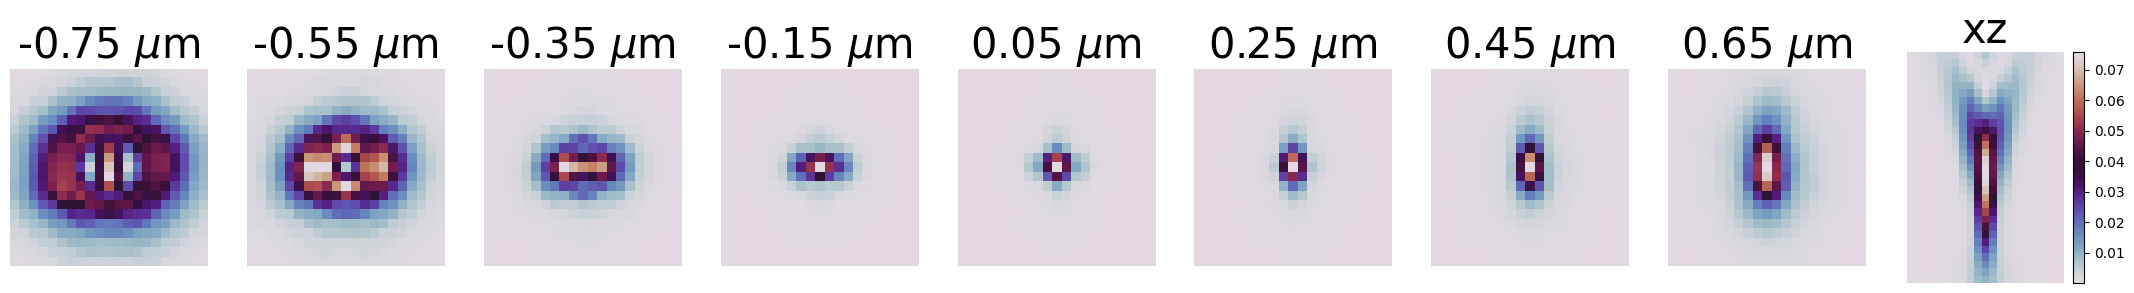

In [4]:
f,psfobj = L.genpsf(f,Nz=31,xsz=21,stagepos=3.0)
showpsf(f,p)

#### Generate spline model and save new PSF file

In [5]:
coeff = L.gencspline(f.res,psfobj)
f.locres.coeff = coeff
filename = resfile[:-3]+'_IMM.h5'
L.writeh5file(filename,f.res,f.locres,f.rois)